In [38]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [15]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "C:\\Users\\Diana\\Desktop\\module 19\\Starter_Code\\Resources\\crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [16]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


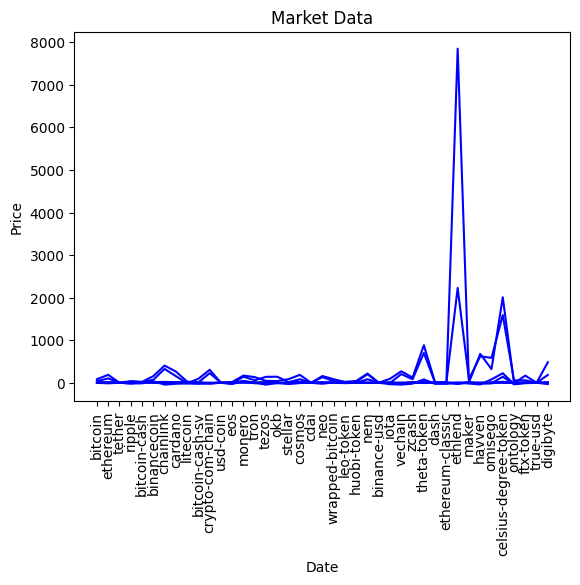

<Figure size 800x400 with 0 Axes>

In [44]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=900,
    height=400,
    rot=90
)
 
import matplotlib.pyplot as plt

# Plot the data
plt.plot(df_market_data.index, df_market_data.values,color= 'blue' )

plt.title('Market Data')

plt.xlabel('Date')
plt.ylabel('Price')

plt.xticks(rotation=90)
plt.figure(figsize=(8, 4))


plt.show()

---

### Prepare the Data

In [45]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(
  df_market_data[['price_change_percentage_24h','price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']]
       )



In [59]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    market_data_scaled,
    columns=['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']
)

# Copy the crypto names from the original data -- "crypto names" = "coin_id"
df_market_data_scaled['coin_id'] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index('coin_id')

# Display sample data
df_market_data_scaled.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [81]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,11))

import numpy as np

In [82]:
# Create an empty list to store the inertia values
inertia_values_stored = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    KModel = KMeans(n_clusters = k )
    KModel.fit(df_market_data_scaled)
    inertia_values_stored.append(KModel.inertia_)


c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

In [83]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {"k": k_values, "inertia": inertia_values_stored}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_curve = pd.DataFrame(elbow_data)

df_elbow_curve


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,66.002038
5,6,52.933559
6,7,44.369538
7,8,36.615242
8,9,32.535281
9,10,28.695449


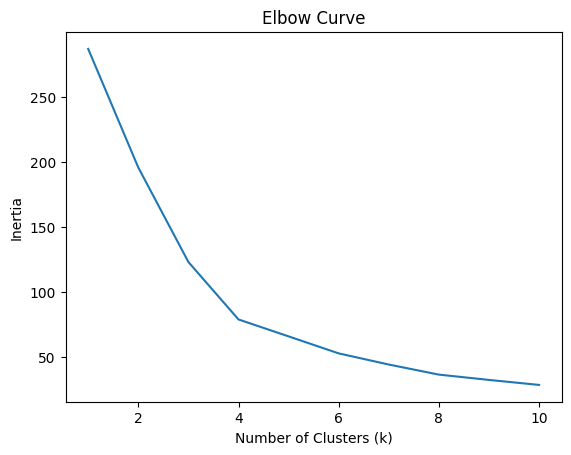

In [87]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_curve.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
#line chart using matplotlib

plt.plot(df_elbow_curve['k'], df_elbow_curve['inertia'])
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  At its elbow point, the best value for k is 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [89]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4,random_state=0)

In [90]:
# Fit the K-Means model using the scaled data
print(kmeans_model.fit(df_market_data_scaled))

KMeans(n_clusters=4, random_state=0)


c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [96]:
# Predict clusters and get the resulting array of cluster values
cluster_values = kmeans_model.labels_

# Print the resulting array of cluster values
print(cluster_values)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [97]:
# Create a copy of the DataFrame
df_copy_predictions = df_market_data_scaled.copy()

In [100]:
# Add a new column to the DataFrame with the predicted clusters

df_copy_predictions['clusters'] = cluster_values
# Display sample data
df_copy_predictions.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [108]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_copy_predictions.hvplot.scatter(
 x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    title="Crypto Predictions",
    by='clusters',
    hover_cols='coin_id' 
)


:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [110]:
# Create a PCA model instance and set `n_components=3`.
pca_model= PCA(n_components=3)

In [115]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
crypto_pca = pca_model.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame. 
df_crypto_pca = crypto_pca

df_crypto_pca[0:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [117]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca_model.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  When we add the first 3 principal components: 0.37+ 0.34 + 0.176 we get a total explained variance of 0.894. The Total Explained Varience is .894 (89%).

In [126]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data

df_crypto_pca2 = pd.DataFrame(
    crypto_pca, columns=["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original data
df_crypto_pca2['coin_id'] = df_market_data_scaled.index


# Set the coinid column as index

df_crypto_pca2 = df_crypto_pca2.set_index(['coin_id'])

# Display sample data
df_crypto_pca.head(10)

,PCA1,PCA2,PCA3,coin_id
0,-0.600667,0.842760,0.461595,bitcoin
1,-0.458261,0.458466,0.952877,ethereum
2,-0.433070,-0.168126,-0.641752,tether
3,-0.471835,-0.222660,-0.479053,ripple
4,-1.157800,2.041209,1.859715,bitcoin-cash
5,-0.516534,1.388377,0.804071,binancecoin
6,-0.450711,0.517699,2.846143,chainlink
7,-0.345600,0.729439,1.478013,cardano
8,-0.649468,0.432165,0.600303,litecoin
9,-0.759014,-0.201200,-0.217653,bitcoin-cash-sv


---

### Find the Best Value for k Using the PCA Data

In [127]:
# Create a list with the number of k-values from 1 to 11
kvalues_pca = list (range(1,11))

In [128]:
# Create an empty list to store the inertia values
invalues_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in kvalues_pca:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df_crypto_pca2)
    invalues_pca.append(kmeans_model.inertia_)

c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

In [147]:
# Create a dictionary with the data to plot the Elbow curve
elbow_pca = {"k" : kvalues_pca, "inertia": invalues_pca}
# Create a DataFrame with the data to plot the Elbow curve
df_elbowc_pca = pd.DataFrame(elbow_pca)

df_elbowc_pca.head()

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.839466


In [149]:
 # Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbowc_pca.hvplot.line(
    x= "k",
    y="inertia",
    title = "PCA Elbow Curve",
    xticks=k   
)

:Curve   [k]   (inertia)

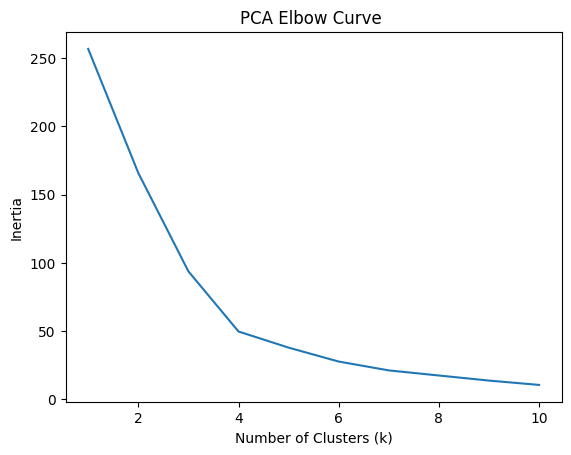

In [151]:
# Plot the line chart
plt.plot(df_elbowc_pca['k'], df_elbowc_pca['inertia'])
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('PCA Elbow Curve ')

# Display the line chart
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
 According to the graph, the best value for k would be 4. this would be becuase this is where the curve begins to go flat.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Compared to the original data, it seems that the value is still 4. However when we look at the "inertia: we notice that the value of 4 is about or belpw 50 with PCA instead of 90 when looking at the original graph.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k


In [26]:
# Fit the K-Means model using the PCA data

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.


In [28]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 